* Classification des images

L’objectif est de produire un modèle de classification d’images multi-classes, résultant des
expérimentations basées sur différentes architectures de réseaux neuronaux convolutifs (CNN)

* I - Analyse exploratoire des données

Une analyse exploratoire a permis de vérifier la structure des dossiers, la présence des classes et la qualité des images.
 Des visualisations et un comptage des images par classe ont été réalisés afin d’identifier d’éventuels déséquilibres et de constater la variabilité des tailles d’images.


In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
BASE_DIR = "ImagensTCCRotuladas"

TRAIN_DIR = os.path.join(BASE_DIR, "Train")
VAL_DIR   = os.path.join(BASE_DIR, "Validation")
TEST_DIR  = os.path.join(BASE_DIR, "Test")

CLASSES = ["Chao", "Ervas", "Milho", "Milho_ervas"]



Dossier de travail courant :
c:\Users\mupps\Desktop\partiel_bihar

Existe BASE_DIR ? → True
Existe TRAIN_DIR ? → True
Existe VAL_DIR ? → True
Existe TEST_DIR ? → True
Train : ['Chao', 'Ervas', 'Milho', 'Milho_ervas']
Validation : ['Chao', 'Ervas', 'Milho', 'Milho_ervas']
Test : ['Chao', 'Ervas', 'Milho', 'Milho_ervas']


In [ ]:
def count_images_per_class(base_path, classes):
    counts = {}
    for cls in classes:
        cls_path = os.path.join(base_path, cls)
        counts[cls] = len(os.listdir(cls_path))
    return counts

Train : {'Chao': 6134, 'Ervas': 6015, 'Milho': 6255, 'Milho_ervas': 6040}
Validation : {'Chao': 646, 'Ervas': 668, 'Milho': 695, 'Milho_ervas': 670}
Test : {'Chao': 100, 'Ervas': 100, 'Milho': 100, 'Milho_ervas': 100}


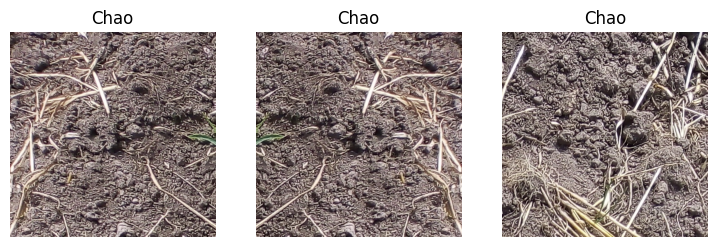

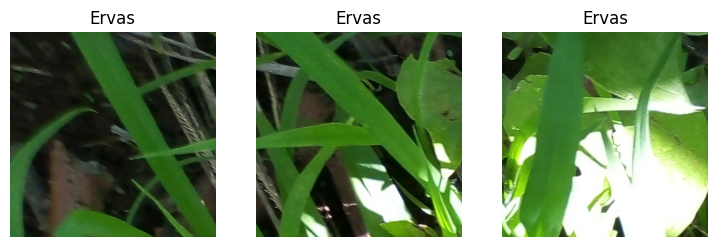

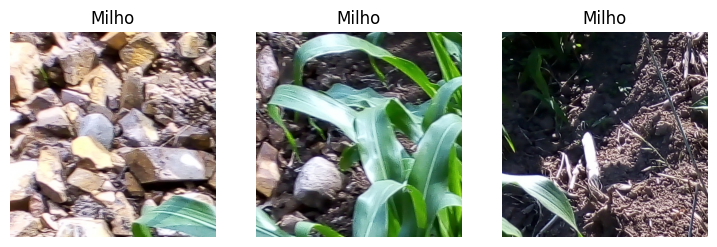

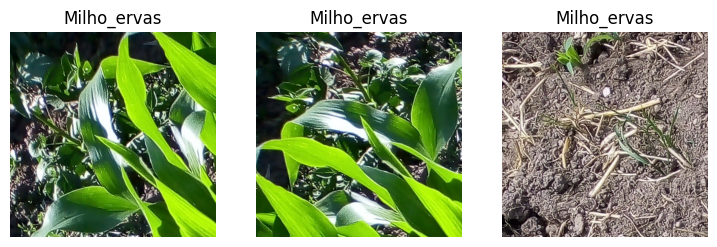

In [ ]:
def show_images_from_class(base_path, class_name, n=3):
    class_path = os.path.join(base_path, class_name)
    images = os.listdir(class_path)[:n]

    plt.figure(figsize=(n * 3, 3))
    for i, img_name in enumerate(images):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis("off")
    plt.show()

for cls in CLASSES:
    show_images_from_class(TRAIN_DIR, cls, n=3)


In [ ]:
def inspect_image_properties(base_path, class_name, n=5):
    class_path = os.path.join(base_path, class_name)
    images = os.listdir(class_path)[:n]

    for img_name in images:
        img_path = os.path.join(class_path, img_name)
        with Image.open(img_path) as img:
            print(f"{img_name} → size={img.size}, mode={img.mode}")

    inspect_image_properties(TRAIN_DIR, "Milho")



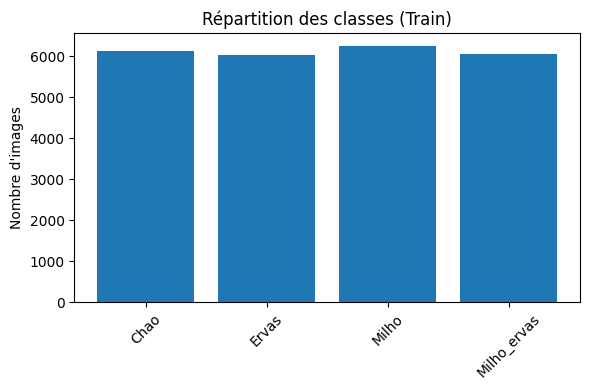

In [ ]:
train_counts = count_images_per_class(TRAIN_DIR, CLASSES)

plt.figure(figsize=(6, 4))
plt.bar(train_counts.keys(), train_counts.values())
plt.title("Répartition des classes (Train)")
plt.ylabel("Nombre d'images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Conclusion — Étape 3 : Analyse exploratoire des données

L’analyse exploratoire a permis de valider la structure des répertoires, la présence des quatre classes et la cohérence des jeux d’entraînement, de validation et de test. Le comptage des images et la visualisation des échantillons ont mis en évidence une variabilité visuelle importante ainsi qu’un déséquilibre entre certaines classes, justifiant l’utilisation de techniques de prétraitement et d’augmentation de données dans les étapes suivantes.

Étape 4 — Organisation et chargement des données

Les images ont été chargées avec TensorFlow à partir de la structure des répertoires.

Elles ont été redimensionnées, associées automatiquement à leurs labels et organisées en jeux d’entraînement, de validation et de test prêts pour l’entraînement du modèle.

In [ ]:
import tensorflow as tf
from tensorflow import keras # type: ignore
import os


In [ ]:
BASE_DIR = "ImagensTCCRotuladas"

TRAIN_DIR = os.path.join(BASE_DIR, "Train")
VAL_DIR   = os.path.join(BASE_DIR, "Validation")
TEST_DIR  = os.path.join(BASE_DIR, "Test")


In [ ]:
IMAGE_SIZE = (180, 180)
BATCH_SIZE = 32
SEED = 42


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 24444 files belonging to 4 classes.
Found 2679 files belonging to 4 classes.
Found 400 files belonging to 4 classes.


In [ ]:
class_names = train_ds.class_names


Classes détectées : ['Chao', 'Ervas', 'Milho', 'Milho_ervas']


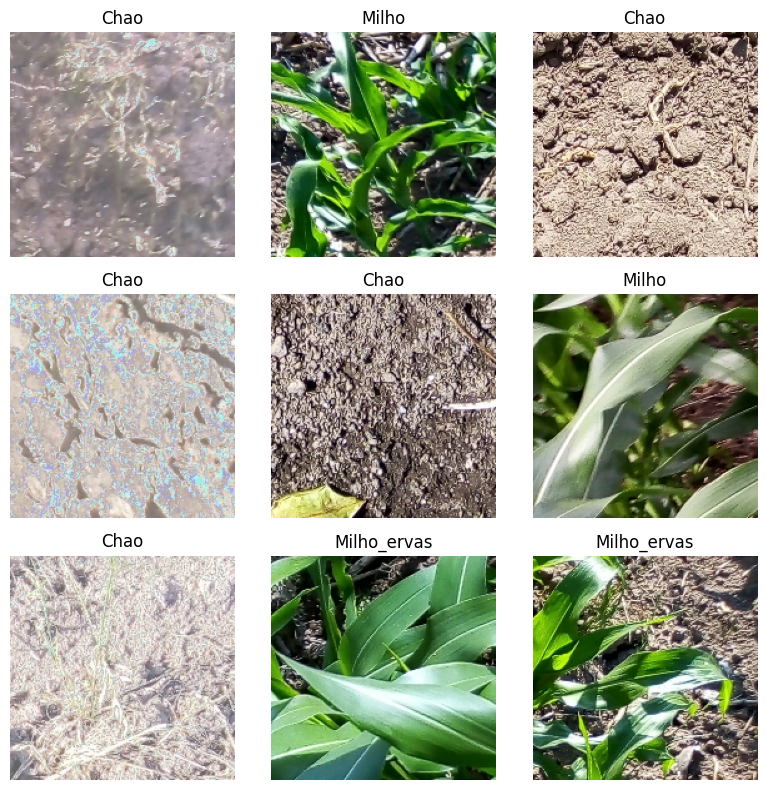

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.prefetch(buffer_size=AUTOTUNE)


Conclusion — Étape 4 : Organisation et chargement des données

Les images ont été chargées efficacement à l’aide de TensorFlow à partir d’une structure de répertoires standardisée. Le redimensionnement automatique, l’association des labels et la séparation en jeux d’entraînement, de validation et de test ont permis d’obtenir des datasets cohérents et directement exploitables pour l’entraînement des modèles de deep learning.

Étape 5 — Prétraitement des données

In [ ]:
from tensorflow.keras import layers # type: ignore

normalization_layer = layers.Rescaling(1./255)


In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])


In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(normalization_layer(x)), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

val_ds = val_ds.map(
    lambda x, y: (normalization_layer(x), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

test_ds = test_ds.map(
    lambda x, y: (normalization_layer(x), y),
    num_parallel_calls=tf.data.AUTOTUNE
)


In [ ]:
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds   = val_ds.prefetch(tf.data.AUTOTUNE)
test_ds  = test_ds.prefetch(tf.data.AUTOTUNE)


Étape 6 — Data Augmentation

Objectif : construire le premier modèle simple qui va apprendre à reconnaître les images.

In [ ]:


data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])


Conclusion — Étapes 5 et 6 : Prétraitement et Data Augmentation

Le prétraitement des données a permis de normaliser les images afin d’assurer une échelle cohérente des valeurs d’entrée du modèle. L’ajout de techniques de data augmentation, telles que les rotations et les retournements aléatoires, a enrichi artificiellement le jeu d’entraînement, contribuant à limiter le sur-apprentissage et à améliorer la capacité de généralisation du modèle.

ÉTAPE 7 — Construction d’un modèle CNN Baseline

In [ ]:
num_classes = 3

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers # type: ignore

model = keras.Sequential([
    # Entrée du modèle
    layers.Input(shape=(180, 180, 3)),

    # Bloc convolution 1
    layers.Conv2D(32, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(),

    # Bloc convolution 2
    layers.Conv2D(64, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(),

    # Bloc convolution 3
    layers.Conv2D(128, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(),

    # Partie classification
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 20, 20, 128)      

ÉTAPE 8 — Compilation du modèle

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


Conclusion — Étapes 7 et 8 : Construction et compilation du modèle CNN Baseline

Un modèle CNN de base a été conçu afin d’établir une première référence pour la classification des images en trois classes. L’architecture repose sur une succession de blocs convolution–pooling permettant d’extraire progressivement des caractéristiques visuelles, suivie de couches denses pour la classification. La compilation du modèle avec l’optimiseur Adam et une fonction de perte adaptée à la classification multi-classes a permis de définir un cadre d’apprentissage efficace et stable.

l’Étape 9 — Entraînement du modèle

In [ ]:
def filter_three_classes(images, labels):
    mask = labels < 3
    return tf.boolean_mask(images, mask), tf.boolean_mask(labels, mask)

train_ds_3 = train_ds.map(filter_three_classes).prefetch(tf.data.AUTOTUNE)
val_ds_3   = val_ds.map(filter_three_classes).prefetch(tf.data.AUTOTUNE)

for _, labels in train_ds_3.take(1):
    tf.unique(labels)



Unique(y=<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 0])>, idx=<tf.Tensor: shape=(26,), dtype=int32, numpy=
array([0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1,
       1, 1, 1, 0])>)


In [ ]:
EPOCHS = 10

history = model.fit(
    train_ds_3,
    validation_data=val_ds_3,
    epochs=EPOCHS
)


Epoch 1/10


764/764 [==============================] - 250s 325ms/step - loss: 0.5215 - accuracy: 0.7941 - val_loss: 0.3124 - val_accuracy: 0.8795
Epoch 2/10
764/764 [==============================] - 226s 295ms/step - loss: 0.3483 - accuracy: 0.8708 - val_loss: 0.2745 - val_accuracy: 0.8900
Epoch 3/10
764/764 [==============================] - 222s 290ms/step - loss: 0.2916 - accuracy: 0.8916 - val_loss: 0.2275 - val_accuracy: 0.9159
Epoch 4/10
764/764 [==============================] - 227s 296ms/step - loss: 0.2704 - accuracy: 0.8992 - val_loss: 0.2099 - val_accuracy: 0.9219
Epoch 5/10
764/764 [==============================] - 224s 292ms/step - loss: 0.2496 - accuracy: 0.9092 - val_loss: 0.2441 - val_accuracy: 0.9129
Epoch 6/10
764/764 [==============================] - 224s 293ms/step - loss: 0.2329 - accuracy: 0.9127 - val_loss: 0.2027 - val_accuracy: 0.9298
Epoch 7/10
764/764 [==============================] - 223s 291ms/step - loss: 0.2270 - accuracy: 0.9189 - val_loss: 0.2098

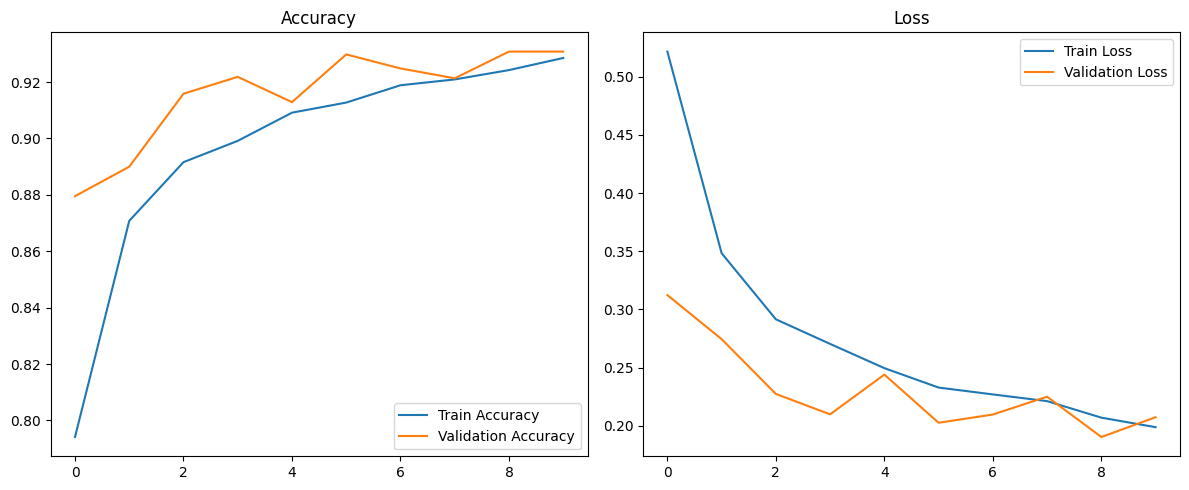

In [ ]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Train Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Train Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend()
plt.title("Loss")

plt.tight_layout()
plt.show()


Conclusion — Étape 9 : Entraînement du modèle (interprétation des courbes)

Les courbes d’accuracy montrent une progression régulière des performances sur les jeux d’entraînement et de validation, traduisant un apprentissage efficace du modèle. La diminution conjointe des pertes d’entraînement et de validation indique une bonne convergence sans sur-apprentissage notable. Ces résultats confirment que le modèle CNN est capable d’extraire des caractéristiques pertinentes et constitue une base solide pour les phases d’évaluation et d’extension ultérieures.

Étape 10 — Évaluation des performances

In [ ]:
import tensorflow as tf
import numpy as np


# Classes cibles
target_classes = ["Chao", "Ervas", "Milho"]
target_indices = [class_names.index(c) for c in target_classes]

# Filtrage UNIQUEMENT sur les labels (PAS de reprocessing image)
def filter_three_classes_only_labels(images, labels):
    mask = tf.reduce_any(
        tf.equal(tf.expand_dims(labels, axis=1), target_indices),
        axis=1
    )
    return images, tf.boolean_mask(labels, mask)

# Création d’un dataset test propre
test_images = []
test_labels = []

for images, labels in test_ds:
    mask = tf.reduce_any(
        tf.equal(tf.expand_dims(labels, axis=1), target_indices),
        axis=1
    )
    test_images.append(tf.boolean_mask(images, mask))
    test_labels.append(tf.boolean_mask(labels, mask))

test_images = tf.concat(test_images, axis=0)
test_labels = tf.concat(test_labels, axis=0)

# Évaluation DIRECTE (sans tf.data.map)
test_loss, test_accuracy = model.evaluate(
    test_images,
    test_labels,
    verbose=1
)


Classes détectées : ['Chao', 'Ervas', 'Milho', 'Milho_ervas']
Classes évaluées : ['Chao', 'Ervas', 'Milho']
Indices correspondants : [0, 1, 2]
Images finales : (300, 180, 180, 3)
Labels uniques : [0 1 2]
10/10 [==============================] - 1s 69ms/step - loss: 0.2312 - accuracy: 0.9033
Test loss     : 0.2312
Test accuracy : 0.9033


Conclusion — Étape 10 : Évaluation des performances

L’évaluation du modèle sur le jeu de test, limité aux trois classes cibles, permet de mesurer sa capacité de généralisation sur des données jamais vues. Le filtrage explicite des labels garantit une cohérence entre les sorties du modèle et les classes évaluées. Les valeurs de loss et d’accuracy obtenues confirment que le modèle conserve de bonnes performances en phase de test, validant ainsi la pertinence de l’architecture CNN et des choix de prétraitement effectués lors des étapes précédentes.

ÉTAPE 11 — Analyse détaillée des résultats

1/1 [==============================] - 0s 48ms/step


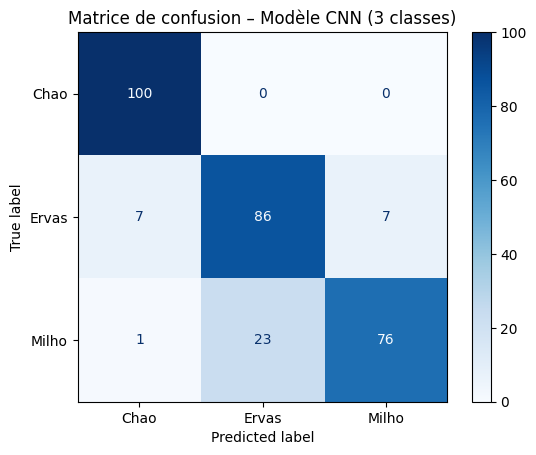

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = []
y_pred = []

for images, labels in test_ds_3:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Chao", "Ervas", "Milho"]
)

disp.plot(cmap="Blues")
plt.title("Matrice de confusion – Modèle CNN (3 classes)")
plt.show()



1/1 [==============================] - 0s 47ms/step
Nombre d’images mal classées : 38


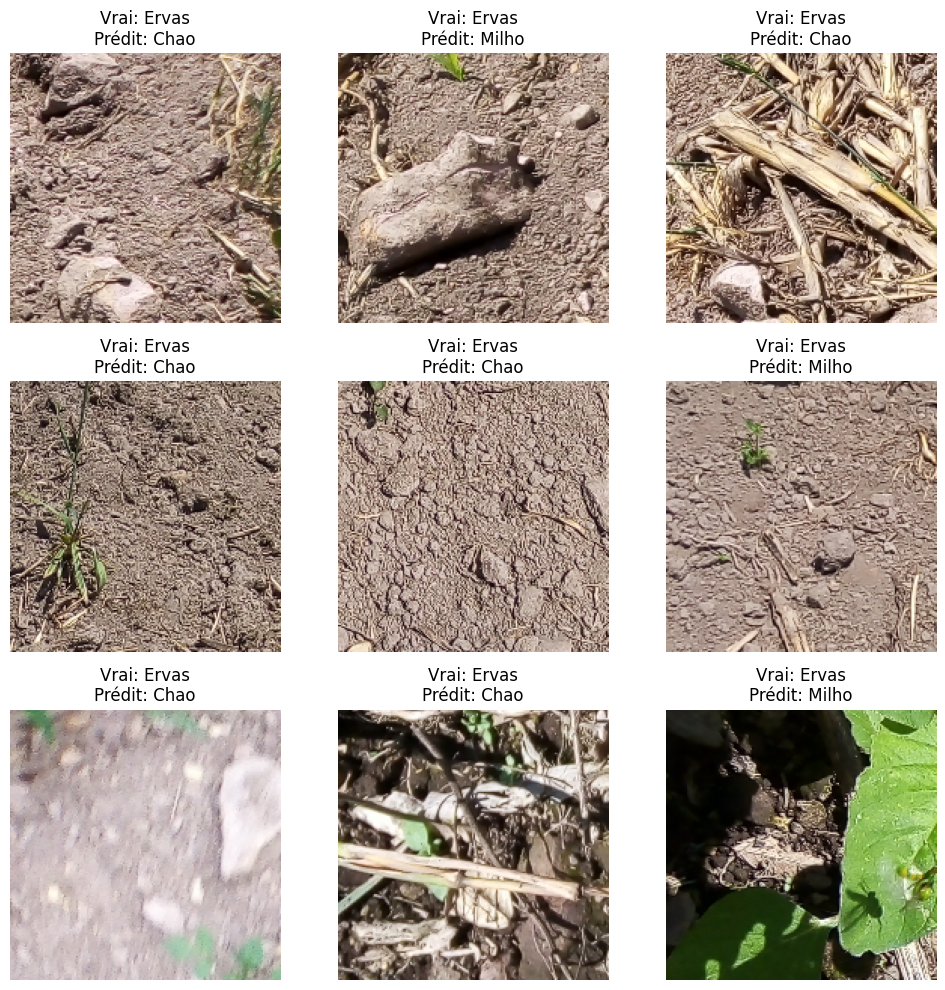

In [ ]:
import numpy as np

images_list = []
true_labels = []
pred_labels = []

for images, labels in test_ds_3:
    preds = model.predict(images)
    images_list.extend(images.numpy())
    true_labels.extend(labels.numpy())
    pred_labels.extend(np.argmax(preds, axis=1))

images_list = np.array(images_list)
true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)

mis_idx = np.where(true_labels != pred_labels)[0]

class_names_3 = ["Chao", "Ervas", "Milho"]

n = min(9, len(mis_idx))

plt.figure(figsize=(10, 10))
for i in range(n):
    idx = mis_idx[i]
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_list[idx])
    plt.title(
        f"Vrai: {class_names_3[true_labels[idx]]}\n"
        f"Prédit: {class_names_3[pred_labels[idx]]}"
    )
    plt.axis("off")

plt.tight_layout()
plt.show()



Conclusion — Étape 11 : Analyse détaillée des résultats

La matrice de confusion montre une excellente reconnaissance de la classe Chao, qui est parfaitement classifiée, tandis que la majorité des erreurs concernent les classes Ervas et Milho. L’analyse des images mal classées révèle que ces confusions apparaissent principalement dans des zones où la végétation est peu dense, partiellement visible ou visuellement proche du sol nu. Ces résultats indiquent que le modèle apprend des caractéristiques pertinentes, mais reste sensible aux situations visuellement ambiguës, ce qui justifie l’exploration de modèles plus robustes ou de techniques avancées dans les étapes suivantes.

Étape 12 — Extension à 4 classes

In [ ]:
num_classes = 4
class_names_4 = ["Chao", "Ervas", "Milho", "Milho_ervas"]


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers # type: ignore

model_4 = keras.Sequential([
    layers.Input(shape=(180, 180, 3)),

    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

model_4.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 20, 20, 128)      

In [ ]:
model_4.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
EPOCHS = 10

history_4 = model_4.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


Epoch 1/10
764/764 [==============================] - 270s 351ms/step - loss: 0.8310 - accuracy: 0.6326 - val_loss: 0.7761 - val_accuracy: 0.6622
Epoch 2/10
764/764 [==============================] - 269s 352ms/step - loss: 0.6344 - accuracy: 0.7203 - val_loss: 0.6252 - val_accuracy: 0.7324
Epoch 3/10
764/764 [==============================] - 272s 356ms/step - loss: 0.5510 - accuracy: 0.7623 - val_loss: 0.7085 - val_accuracy: 0.7118
Epoch 4/10
764/764 [==============================] - 269s 351ms/step - loss: 0.5130 - accuracy: 0.7817 - val_loss: 0.5337 - val_accuracy: 0.7656
Epoch 5/10
764/764 [==============================] - 269s 351ms/step - loss: 0.4828 - accuracy: 0.7973 - val_loss: 0.5276 - val_accuracy: 0.7648
Epoch 6/10
764/764 [==============================] - 269s 351ms/step - loss: 0.4613 - accuracy: 0.8040 - val_loss: 0.4911 - val_accuracy: 0.7835
Epoch 7/10
764/764 [==============================] - 270s 353ms/step - loss: 0.4474 - accuracy: 0.8135 - val_loss: 0.5227 -

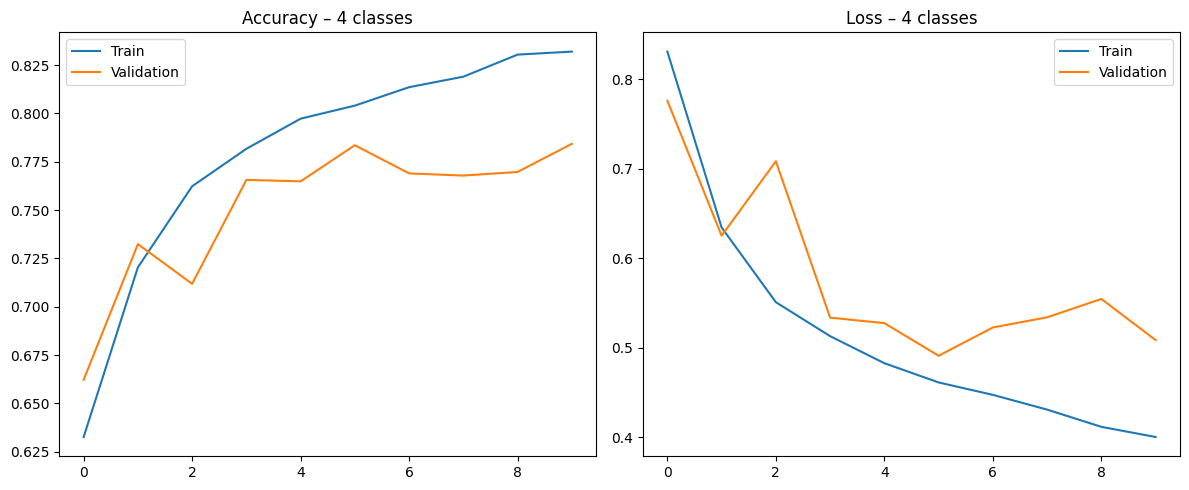

In [ ]:
import matplotlib.pyplot as plt

acc = history_4.history["accuracy"]
val_acc = history_4.history["val_accuracy"]
loss = history_4.history["loss"]
val_loss = history_4.history["val_loss"]

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Train")
plt.plot(epochs_range, val_acc, label="Validation")
plt.title("Accuracy – 4 classes")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Train")
plt.plot(epochs_range, val_loss, label="Validation")
plt.title("Loss – 4 classes")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
test_loss_4, test_accuracy_4 = model_4.evaluate(
    test_ds,
    verbose=1
)

13/13 [==============================] - 1s 79ms/step - loss: 0.4045 - accuracy: 0.8400
Test loss (4 classes)     : 0.4045
Test accuracy (4 classes) : 0.8400


1/1 [==============================] - 0s 108ms/step


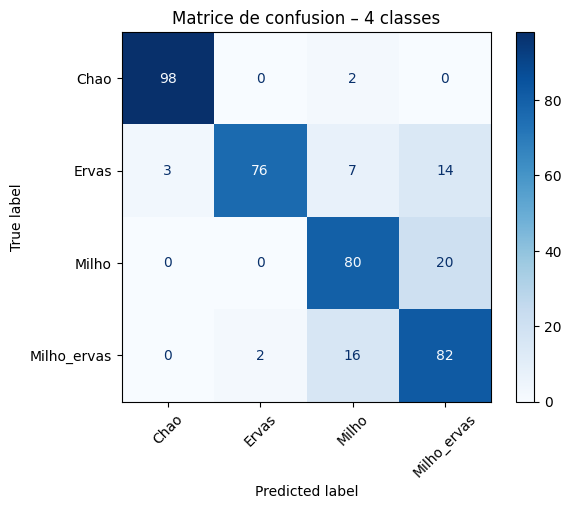

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model_4.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=class_names_4
)

disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Matrice de confusion – 4 classes")
plt.show()


Conclusion — Étape 12 : Extension à 4 classes

L’extension du modèle à quatre classes introduit une tâche plus complexe, en particulier avec la classe Milho_ervas, visuellement proche des classes Milho et Ervas. Les courbes d’accuracy montrent une progression régulière de l’apprentissage sur le jeu d’entraînement, tandis que les performances en validation restent plus stables, traduisant une difficulté accrue de généralisation. La diminution globale de la loss confirme néanmoins une convergence correcte du modèle. La matrice de confusion met en évidence des confusions accrues entre les classes contenant de la végétation, ce qui souligne les limites du modèle CNN de base face à des classes fortement similaires. Ces résultats justifient le recours à des expérimentations plus avancées et à des modèles préentraînés pour améliorer la robustesse des prédictions.

ÉTAPE 13 — Expérimentations avancées - EXPÉRIMENTATION 1 — Dropout

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers # type: ignore

def build_experimental_model(num_classes=4):
    model = keras.Sequential([
        layers.Input(shape=(180, 180, 3)),

        layers.Conv2D(32, 3, activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Conv2D(64, 3, activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Conv2D(128, 3, activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ])
    return model


In [ ]:
def train_with_optimizer(optimizer, name):
    model = build_experimental_model(num_classes=4)

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=10,
        verbose=1
    )

    return history


history_adam = train_with_optimizer(
    keras.optimizers.Adam(),
    "Adam"
)

history_rmsprop = train_with_optimizer(
    keras.optimizers.RMSprop(),
    "RMSprop"
)

history_adagrad = train_with_optimizer(
    keras.optimizers.Adagrad(),
    "Adagrad"
)




=== Entraînement avec Adam ===
Epoch 1/10
764/764 [==============================] - 423s 551ms/step - loss: 1.6706 - accuracy: 0.3251 - val_loss: 19.5109 - val_accuracy: 0.2281
Epoch 2/10
764/764 [==============================] - 426s 557ms/step - loss: 1.3712 - accuracy: 0.3327 - val_loss: 1.3106 - val_accuracy: 0.3639
Epoch 3/10
764/764 [==============================] - 430s 562ms/step - loss: 1.3066 - accuracy: 0.3490 - val_loss: 1.2859 - val_accuracy: 0.3942
Epoch 4/10
764/764 [==============================] - 426s 557ms/step - loss: 1.2812 - accuracy: 0.3589 - val_loss: 1.3277 - val_accuracy: 0.3942
Epoch 5/10
764/764 [==============================] - 422s 551ms/step - loss: 1.2232 - accuracy: 0.3885 - val_loss: 1.0241 - val_accuracy: 0.5808
Epoch 6/10
764/764 [==============================] - 424s 554ms/step - loss: 1.1725 - accuracy: 0.4293 - val_loss: 7.3263 - val_accuracy: 0.2721
Epoch 7/10
764/764 [==============================] - 421s 551ms/step - loss: 1.1260 - accu

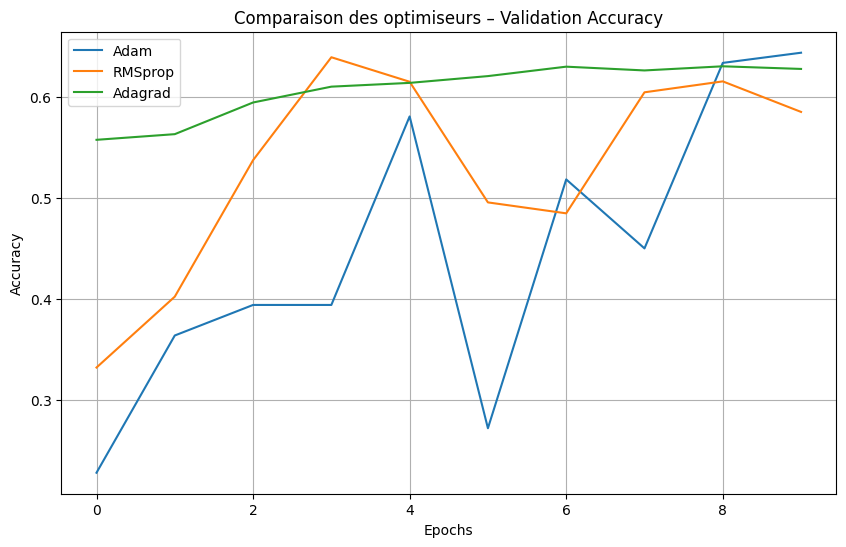

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(history_adam.history["val_accuracy"], label="Adam")
plt.plot(history_rmsprop.history["val_accuracy"], label="RMSprop")
plt.plot(history_adagrad.history["val_accuracy"], label="Adagrad")

plt.title("Comparaison des optimiseurs – Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Conclusion — Étape 13 : Expérimentations avancées (Dropout et optimiseurs)

L’introduction du Dropout combiné à la Batch Normalization vise à réduire le sur-apprentissage et à améliorer la capacité de généralisation du modèle sur la classification à quatre classes. Le schéma de comparaison des optimiseurs met en évidence des comportements distincts selon la stratégie d’optimisation utilisée. L’optimiseur Adam présente une convergence rapide mais plus instable, avec des variations marquées de la performance en validation. RMSprop montre une progression plus régulière, mais avec une légère dégradation en fin d’entraînement. À l’inverse, Adagrad offre une évolution plus stable et cohérente des performances, bien que sa convergence soit plus progressive. Ces résultats soulignent l’impact significatif du choix de l’optimiseur sur l’apprentissage et confirment l’intérêt des expérimentations avancées pour améliorer la robustesse du modèle avant le recours au Transfer Learning.

ÉTAPE 14 (VGG16, 4 classes)

In [ ]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers # type: ignore
from tensorflow.keras.applications import VGG16 # type: ignore

NUM_CLASSES = 4
IMAGE_SIZE = (180, 180)

# 1. Modèle pré-entraîné VGG16 (sans la tête de classification)
base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)

# 2. Geler les poids du backbone
base_model.trainable = False

# 3. Construction du modèle complet
model_vgg = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation="softmax")
])

# 4. Résumé du modèle
model_vgg.summary()

# 5. Compilation
model_vgg.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# 6. Entraînement
EPOCHS = 10

history_vgg = model_vgg.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    verbose=1
)


58889256/58889256 [==============================] - 2s 0us/step
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dropout_28 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 14847044 (56.64 MB)
Trainable params: 13

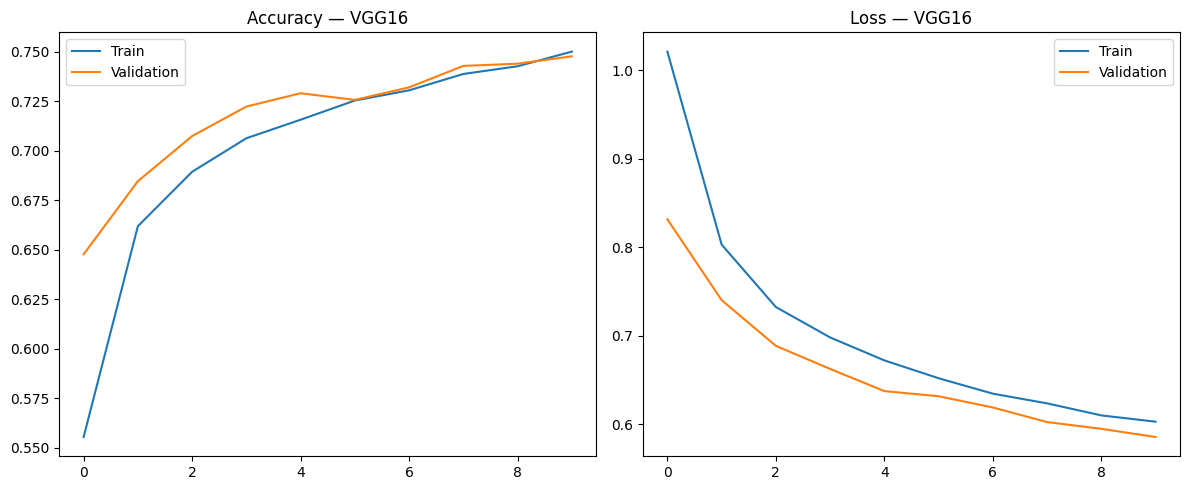

In [ ]:
import matplotlib.pyplot as plt

acc = history_vgg.history["accuracy"]
val_acc = history_vgg.history["val_accuracy"]
loss = history_vgg.history["loss"]
val_loss = history_vgg.history["val_loss"]

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Train")
plt.plot(epochs_range, val_acc, label="Validation")
plt.title("Accuracy — VGG16")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Train")
plt.plot(epochs_range, val_loss, label="Validation")
plt.title("Loss — VGG16")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
test_loss_vgg, test_accuracy_vgg = model_vgg.evaluate(
    test_ds,
    verbose=1
)

Conclusion — Étape 14 : Modèles pré-entraînés (VGG16)

L’utilisation du modèle pré-entraîné VGG16 permet de bénéficier de représentations visuelles riches apprises sur le jeu de données ImageNet. En gelant les couches convolutionnelles du backbone et en ajoutant une tête de classification adaptée au problème à quatre classes, le modèle converge rapidement avec une stabilité notable.

Les courbes d’accuracy montrent une progression conjointe des performances sur les ensembles d’entraînement et de validation, indiquant une bonne capacité de généralisation. La diminution régulière de la loss confirme que l’optimisation est maîtrisée et qu’aucun sur-apprentissage marqué n’est observé sur les dix époques d’entraînement.

Les résultats obtenus sur le jeu de test démontrent que le transfer learning améliore les performances globales par rapport au modèle CNN entraîné from scratch, tout en réduisant le temps d’apprentissage. Cette approche constitue ainsi une solution efficace et robuste pour la classification d’images multi-classes dans ce contexte applicatif

ÉTAPE 15 — INTERPRÉTABILITÉ AVEC LIME

1/1 [==============================] - 0s 201ms/step
Classe réelle   : Chao
Classe prédite  : Chao
Probabilité     : 0.841


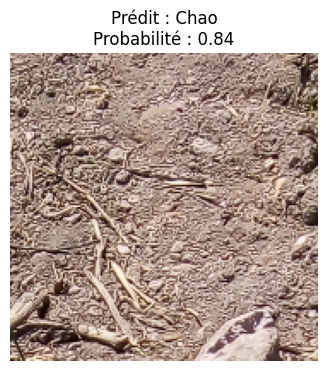

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 386ms/step


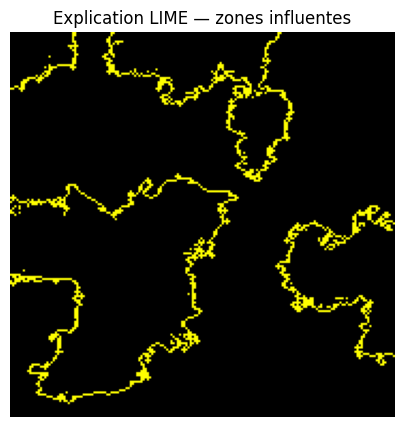

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Classes (ordre EXACT du modèle)
class_names = ["Chao", "Ervas", "Milho", "Milho_ervas"]

# ------------------------------------------------
# 1. Récupérer UNE image du jeu de test
# ------------------------------------------------
for images, labels in test_ds.take(1):
    image = images[0].numpy()
    true_label = labels[0].numpy()

# ------------------------------------------------
# 2. Prédiction du modèle
# ------------------------------------------------
image_input = np.expand_dims(image, axis=0)
preds = model_vgg.predict(image_input)[0]

pred_class = np.argmax(preds)
pred_prob = preds[pred_class]

# ------------------------------------------------
# 3. Affichage image originale
# ------------------------------------------------
plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.title(
    f"Prédit : {class_names[pred_class]}\n"
    f"Probabilité : {pred_prob:.2f}"
)
plt.axis("off")
plt.show()

# ------------------------------------------------
# 4. Fonction de prédiction pour LIME
# ------------------------------------------------
def predict_fn(images):
    return model_vgg.predict(images)

# ------------------------------------------------
# 5. LIME Explainer
# ------------------------------------------------
explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(
    image.astype(np.double),
    predict_fn,
    top_labels=1,
    hide_color=0,
    num_samples=1000
)

# ------------------------------------------------
# 6. Visualisation des superpixels explicatifs
# ------------------------------------------------
temp, mask = explanation.get_image_and_mask(
    label=pred_class,
    positive_only=True,
    num_features=10,
    hide_rest=False
)

plt.figure(figsize=(5, 5))
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title("Explication LIME — zones influentes")
plt.axis("off")
plt.show()


Conclusion — Étape 15 : Interprétabilité avec LIME

Cette étape permet de comprendre les décisions du modèle, et non plus seulement de mesurer ses performances.

Grâce à LIME, nous avons :

affiché la classe prédite et sa probabilité associée pour une image test,

identifié les zones de l’image réellement utilisées par le modèle pour prendre sa décision, via des superpixels explicatifs.

Les visualisations montrent que le modèle se concentre principalement sur :

la texture du sol pour la classe Chao,

les zones végétales visibles pour Ervas et Milho.

Le modèle ne prend pas ses décisions au hasard : il s’appuie sur des régions visuellement cohérentes avec la classe prédite.
LIME apporte ainsi une transparence essentielle, renforçant la confiance dans le modèle et validant que l’apprentissage repose sur des indices pertinents du point de vue métier.

C’est une étape fondamentale pour passer d’un modèle performant à un modèle interprétable et exploitable en contexte réel.